## seaborn

In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import anndata as ad
import seaborn as sns
input_dir = "/Users/apple/Desktop/KB/data/feat_RECOMB/LCL_larry200_train_test_with_diff_alpha"
num_top_lg_toplot = 5

# Load dataset
# data = np.load(input_dir+'/feat_submission/feat_1006_bs260_sf04_larry_full/scBaseEncoderFeat_Z_bs260_tau0.5.npy')
data = np.load(input_dir+'/feat_1025_larry_train_test__final_bs100_sf01/Larry_LCL_train_embeddings_bs100_sf01.npy')

adata_subset = ad.read_h5ad('/Users/apple/Desktop/KB/data/LarryData/train_test/Larry_train.h5ad')

# Extract clone_id labels
labels = adata_subset.obs["clone_id"].to_numpy()
num_cells = labels.shape[0]

print("data shape", data.shape)
print("labels shape", num_cells)

# Initialize UMAP and fit the data
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

data shape (37207, 64)
labels shape 37207


In [7]:
# Save the embeddings to a .npy file
np.save("embedding.npy", embedding)
# Load the embeddings from the .npy file
# embedding = np.load("LCL_larry_full_UMAP_embedding.npy")


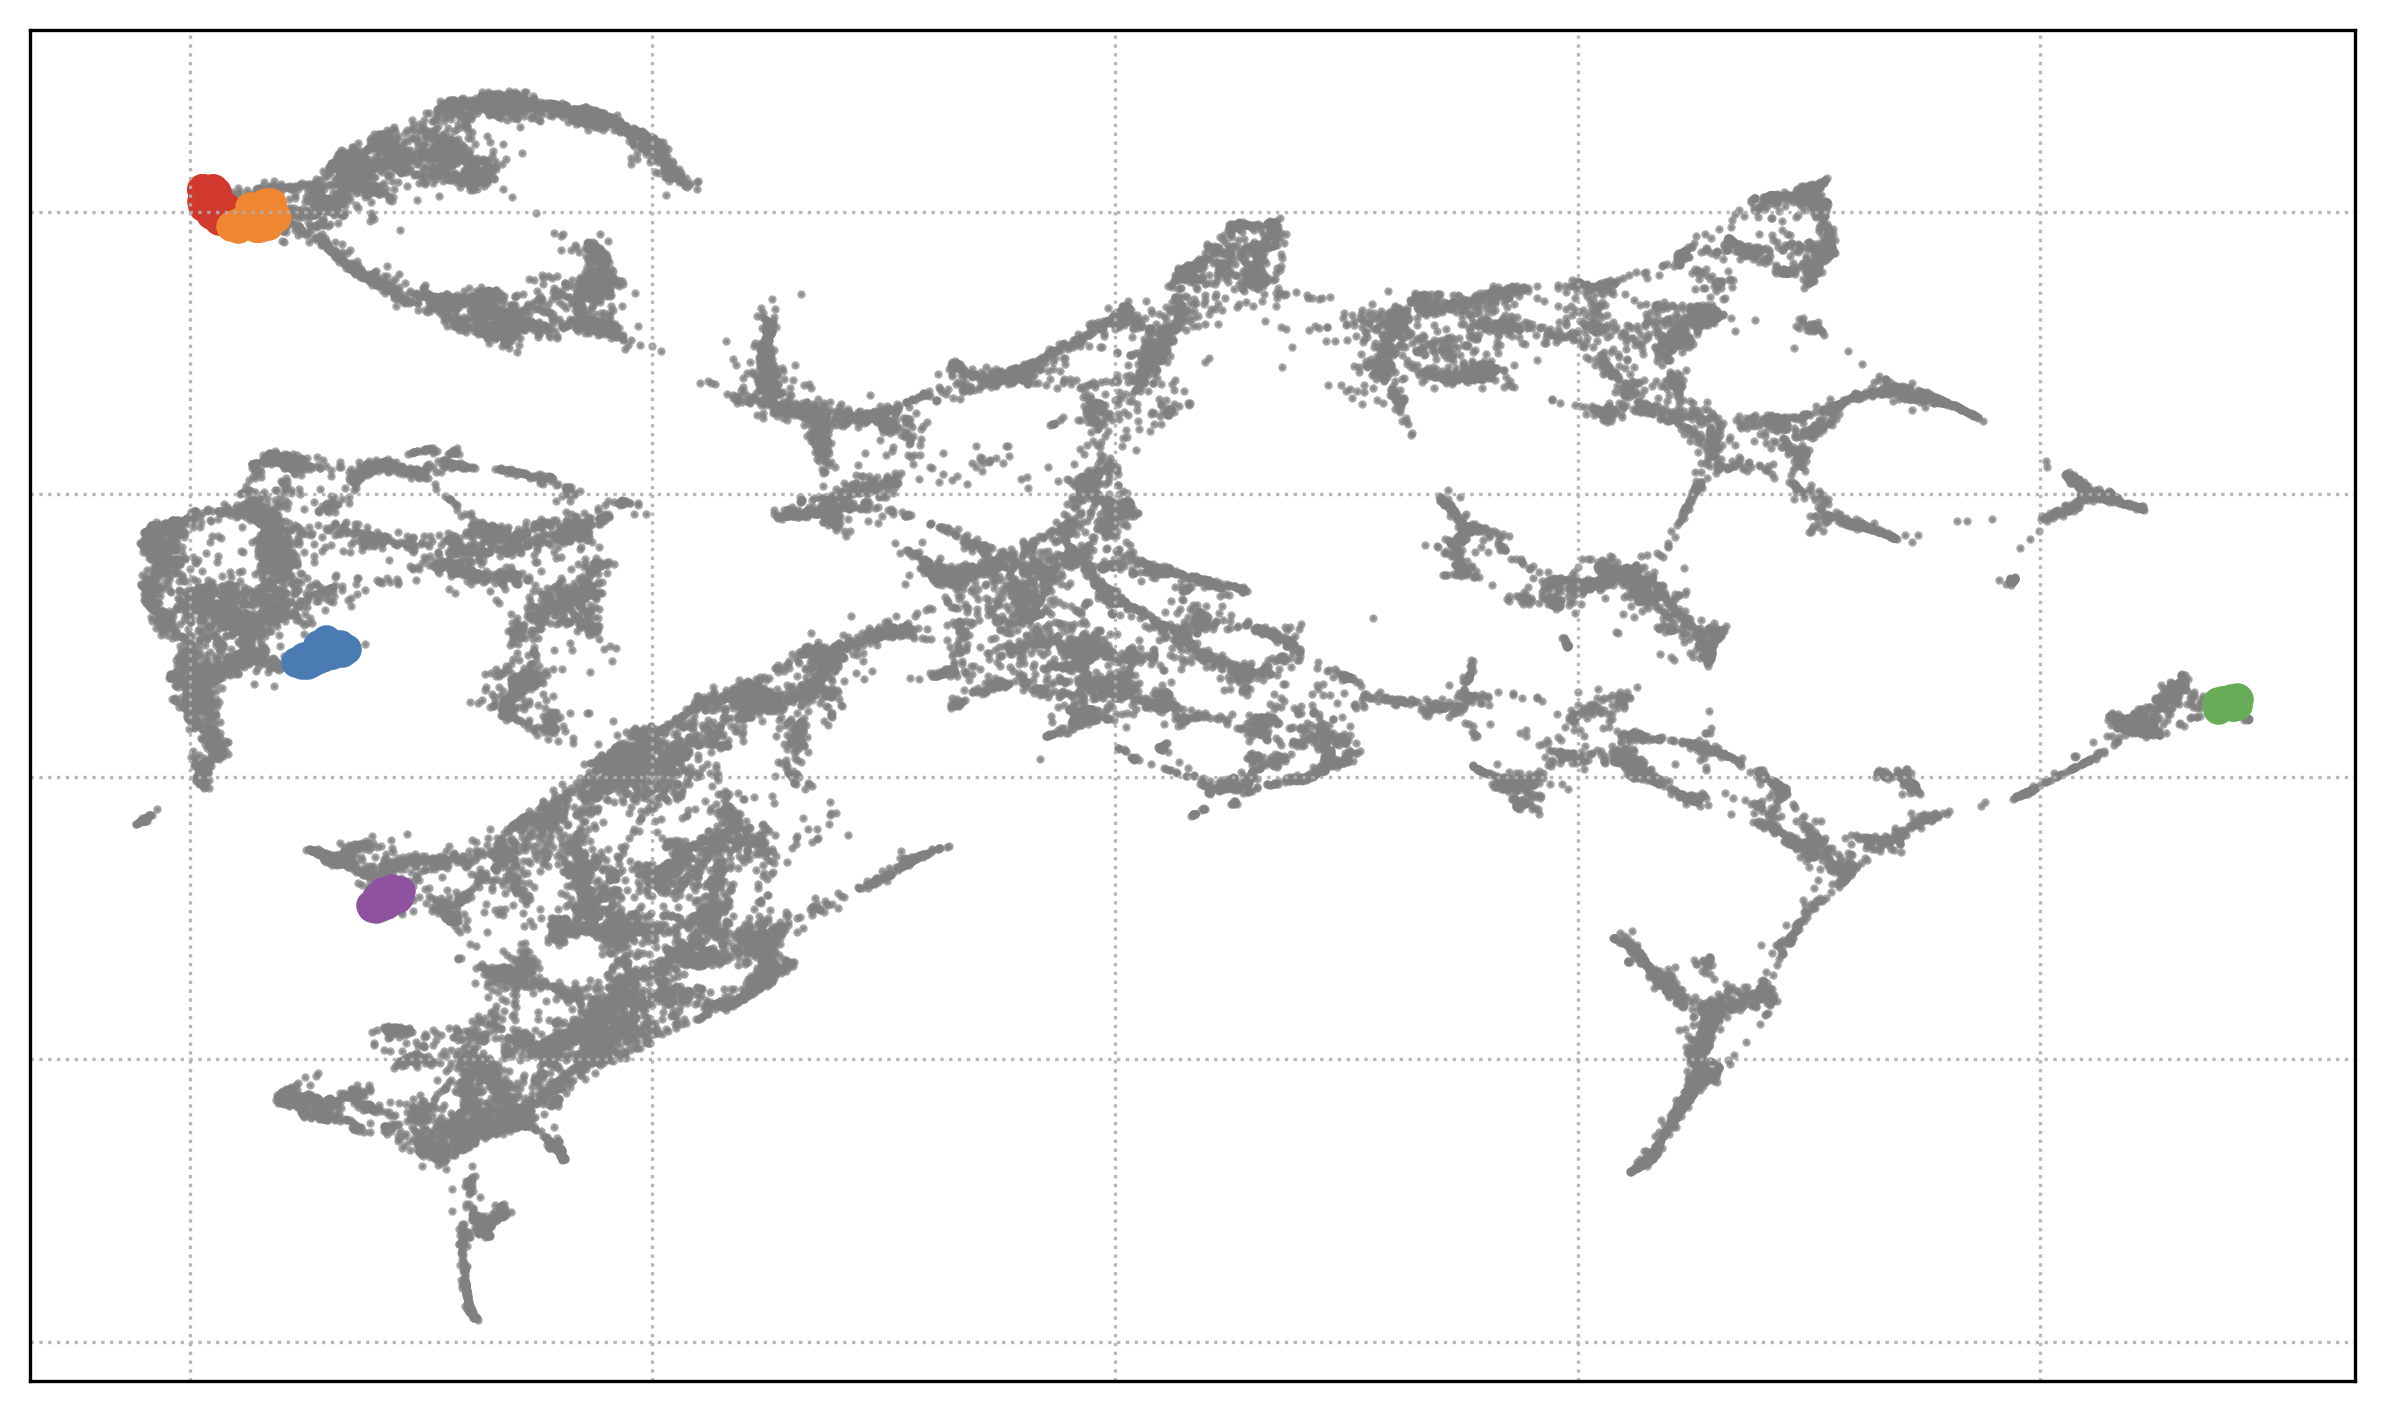

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the value counts of the clone_id
clone_id_counts = adata_subset.obs['clone_id'].value_counts()

# Identify the top 5 most frequent clone_ids
top_5_clone_ids = clone_id_counts.index[:5]

# Create a color map: all points are light gray by default
color_map = {clone_id: 'lightgray' for clone_id in labels}

# Convert the given RGB codes into hex format
custom_palette = ['#D1392C', '#4A7CB3', '#67AD57', '#8E529F', '#EE8632']  # Replacing with your provided RGB values

# Assign colors to the top 5 clone_ids using the provided color codes
for i, clone_id in enumerate(top_5_clone_ids):
    color_map[clone_id] = custom_palette[i]

# Generate the colors list based on the color_map
colors = [color_map[clone_id] for clone_id in labels]

# Separate indices for gray and colored cells
gray_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] == 'lightgray']
color_indices = [i for i, clone_id in enumerate(labels) if color_map[clone_id] != 'lightgray']

# Create a scatter plot of the UMAP embedding
plt.figure(figsize=(10, 5.85), dpi=300)
# Add grid to the plot
plt.grid(True, alpha=0.9, linestyle=':')
# Remove axis ticks and labels, but keep the grid
plt.gca().tick_params(axis='both', which='both', length=0)  # Hides the tick marks but keeps the grid lines
plt.gca().set_xticklabels([])  # Hides the x-axis labels
plt.gca().set_yticklabels([])  # Hides the y-axis labels
# Plot gray cells first
plt.scatter(embedding[gray_indices, 0], embedding[gray_indices, 1], c='gray', s=1, label='_nolegend_', alpha=0.7)

# Overlay colored cells
for clone_id in top_5_clone_ids:
    color_mask = np.array([clone_id == cid for cid in labels])
    plt.scatter(embedding[color_mask, 0], embedding[color_mask, 1], 
                c=[color_map[clone_id]], s=40, label=clone_id)



# Create a custom legend for the top 5 clone IDs
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_palette[i], markersize=10, label=f'{clone_id}')
                  for i, clone_id in enumerate(top_5_clone_ids)]
# plt.legend(handles=legend_handles, title="Top 5 Clone IDs")

plt.show()


In [ ]:
from sklearn.metrics import calinski_harabasz_score
# Calculate the Calinski-Harabasz score
score = calinski_harabasz_score(data, labels)

# Print the score
print("Calinski-Harabasz Score:", score)
